<a href="https://colab.research.google.com/github/ShaliniVaibhav/ML/blob/main/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
print(df.isnull().any())


Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool


<Axes: >

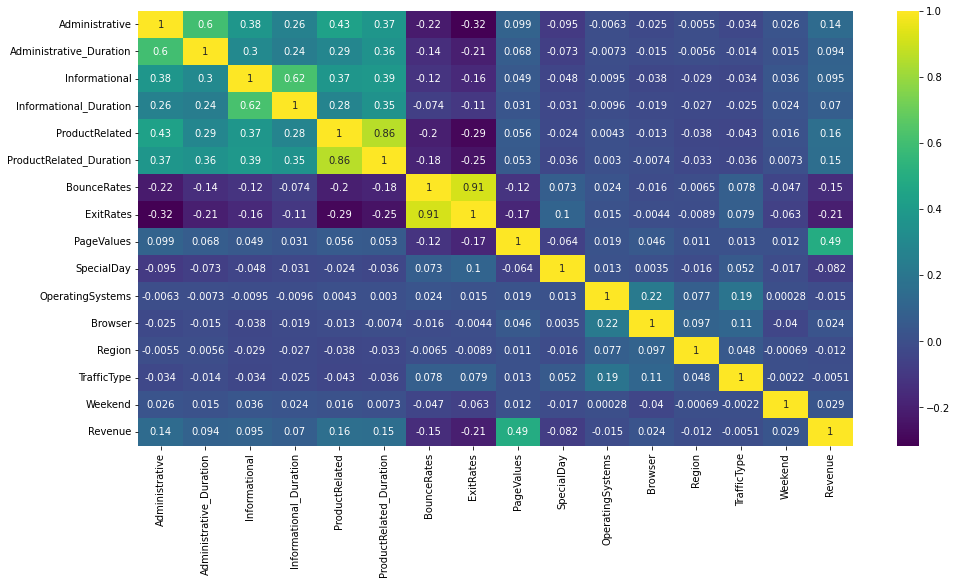

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [9]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

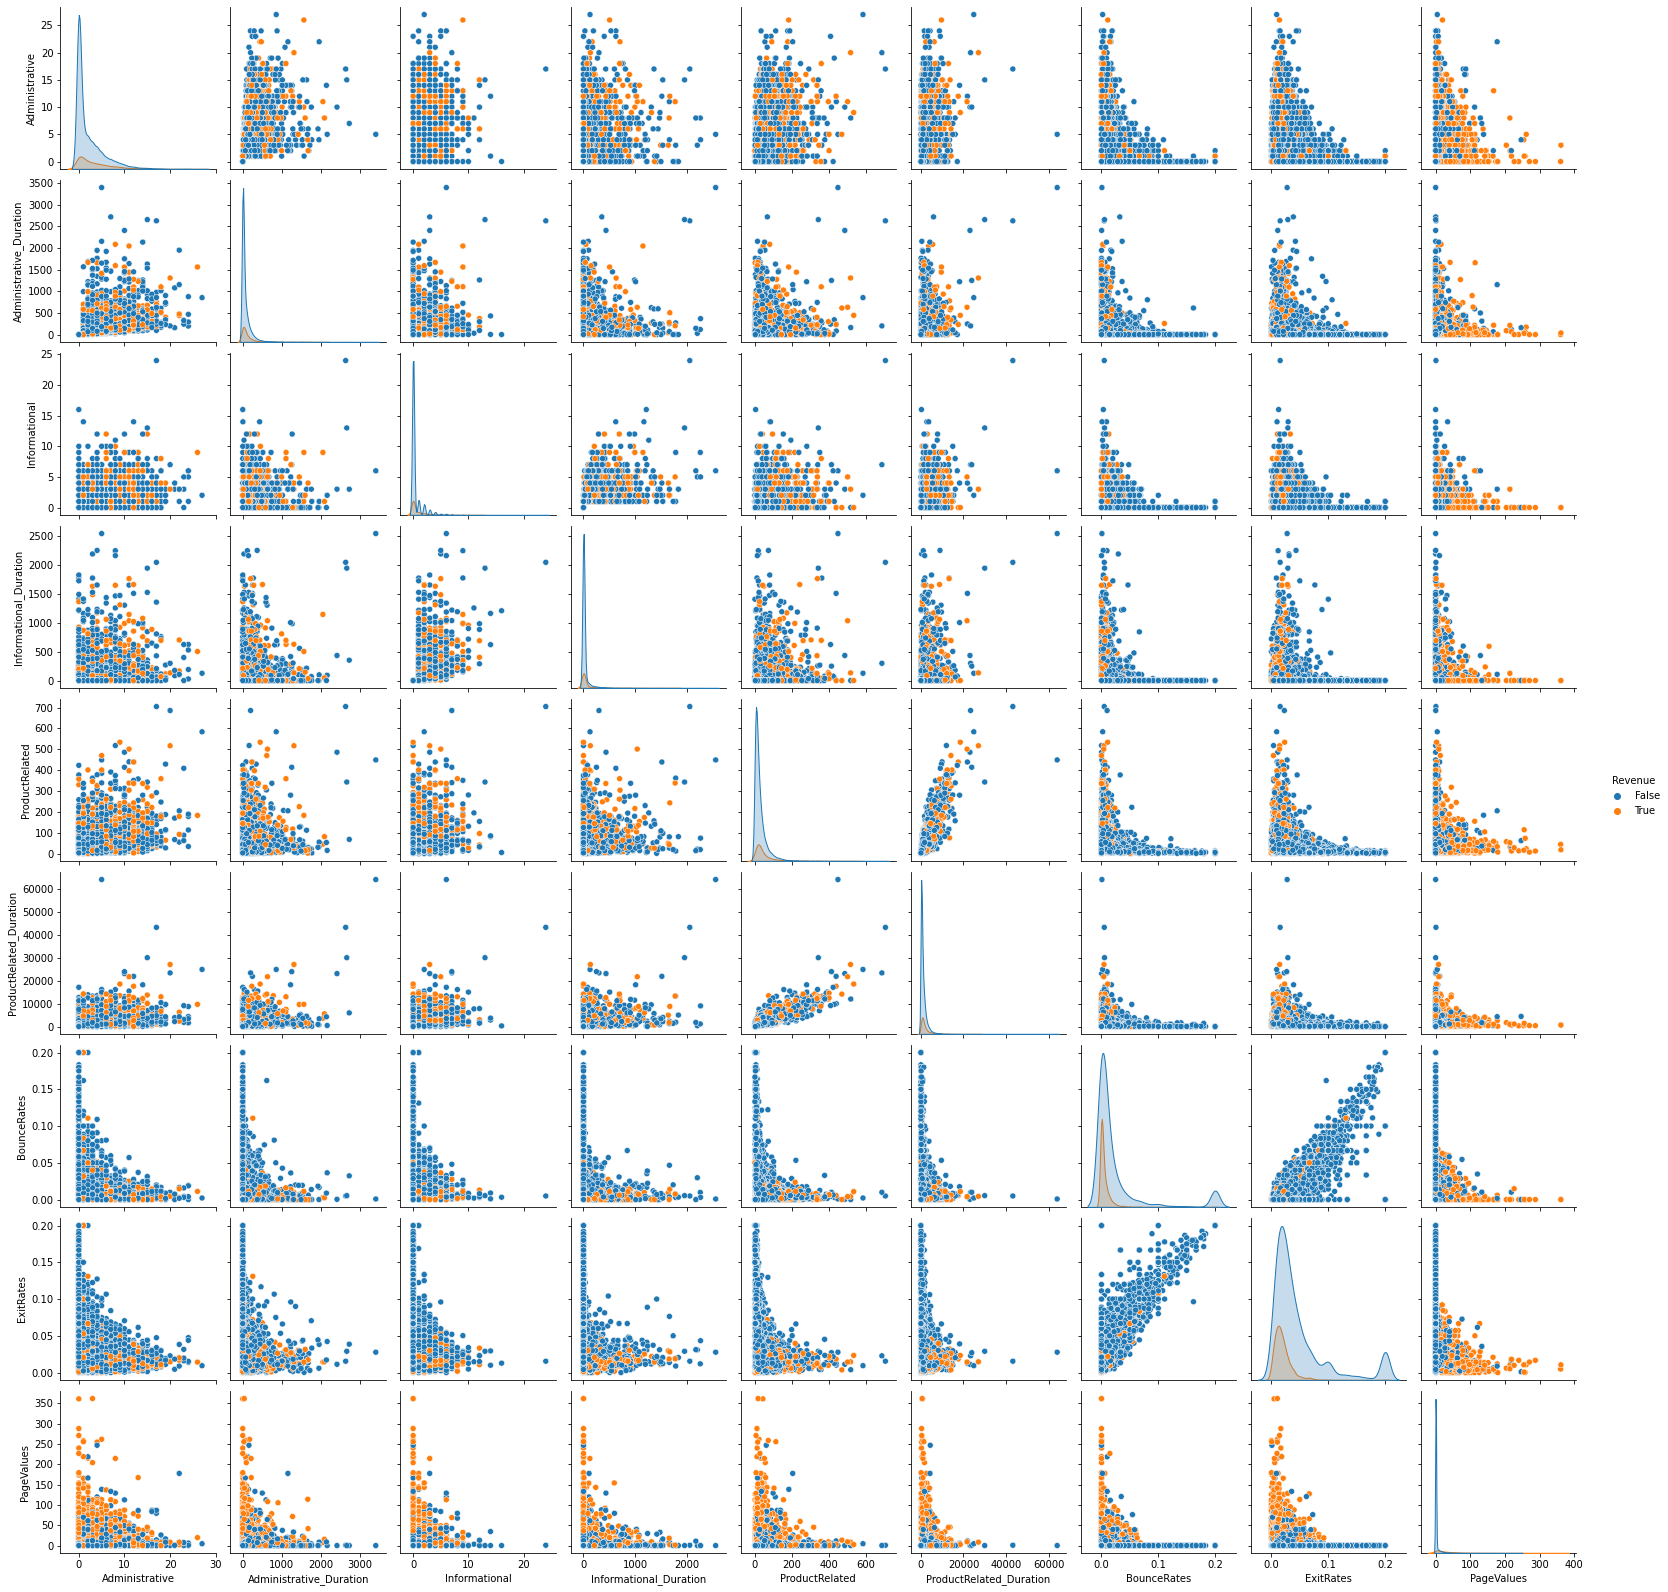

In [10]:
sns.pairplot(df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues','Revenue']],hue='Revenue')

In [11]:
print(df['Browser'].unique())
print(df['TrafficType'].unique())
print(df['OperatingSystems'].unique())
print(df['SpecialDay'].unique())
print(df['Month'].unique())
print(df['VisitorType'].unique())
print(df['Region'].unique())

[ 1  2  3  4  5  6  7 10  8  9 12 13 11]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
[1 2 4 3 7 6 8 5]
[0.  0.4 0.8 1.  0.2 0.6]
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']
[1 9 2 3 4 5 6 7 8]


In [12]:
df[['Browser','TrafficType','OperatingSystems','Region']] = df[['Browser','TrafficType','OperatingSystems','Region']].astype(str)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

<Axes: xlabel='Weekend', ylabel='count'>

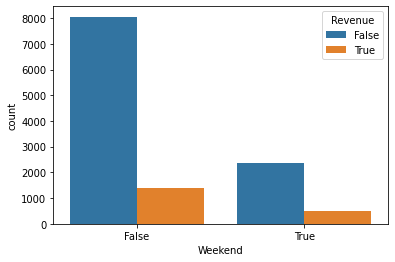

In [14]:
sns.countplot(data=df,x='Weekend',hue='Revenue')

<Axes: xlabel='Revenue', ylabel='count'>

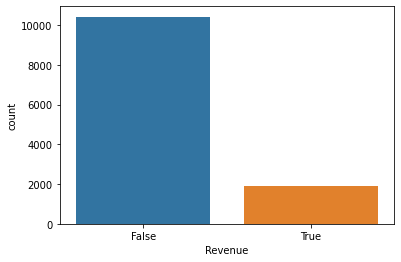

In [15]:
sns.countplot(data=df,x='Revenue')

<Axes: xlabel='Month', ylabel='count'>

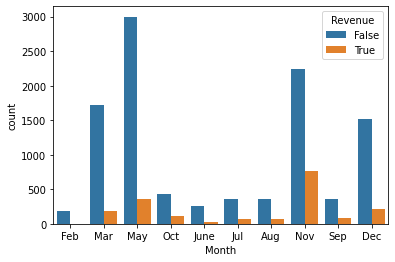

In [16]:
sns.countplot(data=df,x='Month',hue='Revenue')

<Axes: xlabel='Revenue', ylabel='PageValues'>

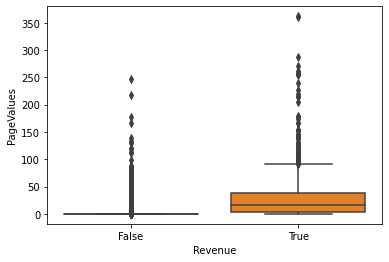

In [17]:
sns.boxplot(data=df,y='PageValues',x='Revenue')

<Axes: xlabel='Month', ylabel='Revenue'>

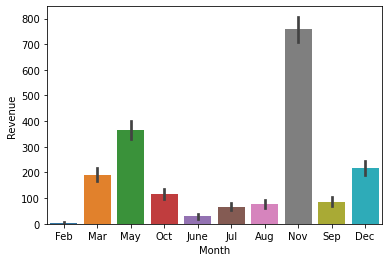

In [18]:
sns.barplot(data=df,x='Month',y='Revenue',estimator=np.sum)

<Axes: xlabel='ExitRates', ylabel='BounceRates'>

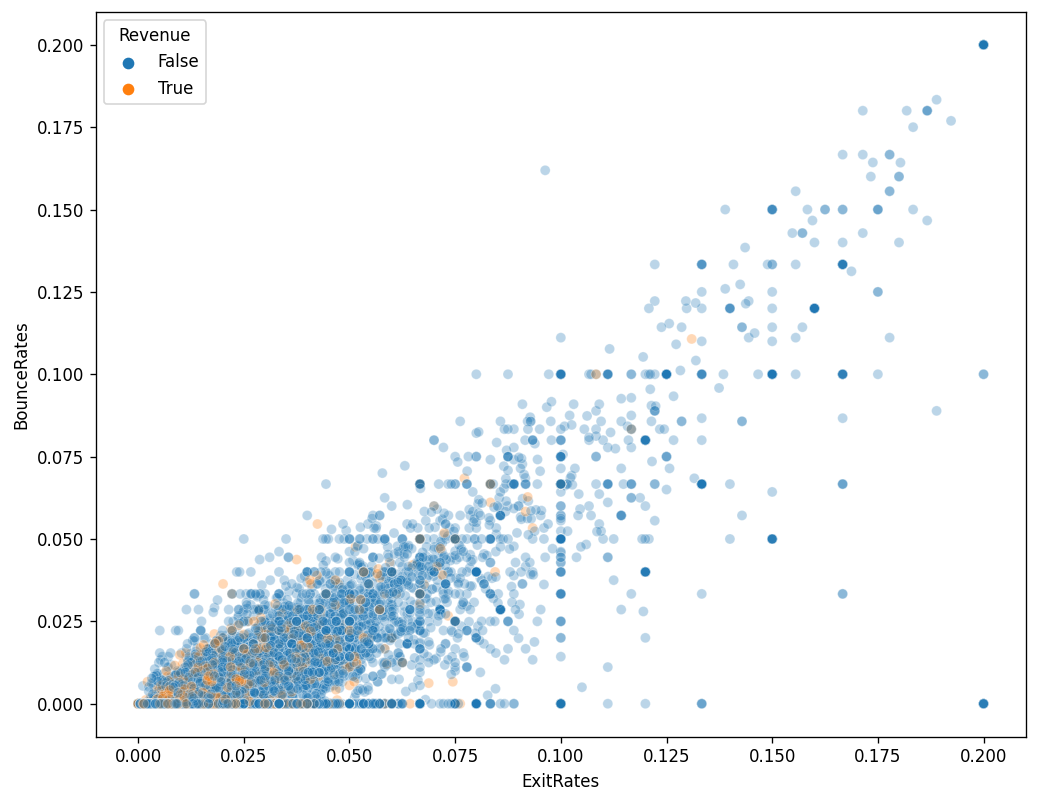

In [19]:

plt.figure(figsize=(10,8),dpi=120)
sns.scatterplot(data=df,x='ExitRates',y='BounceRates',hue='Revenue',alpha=0.3)

<Axes: xlabel='BounceRates', ylabel='PageValues'>

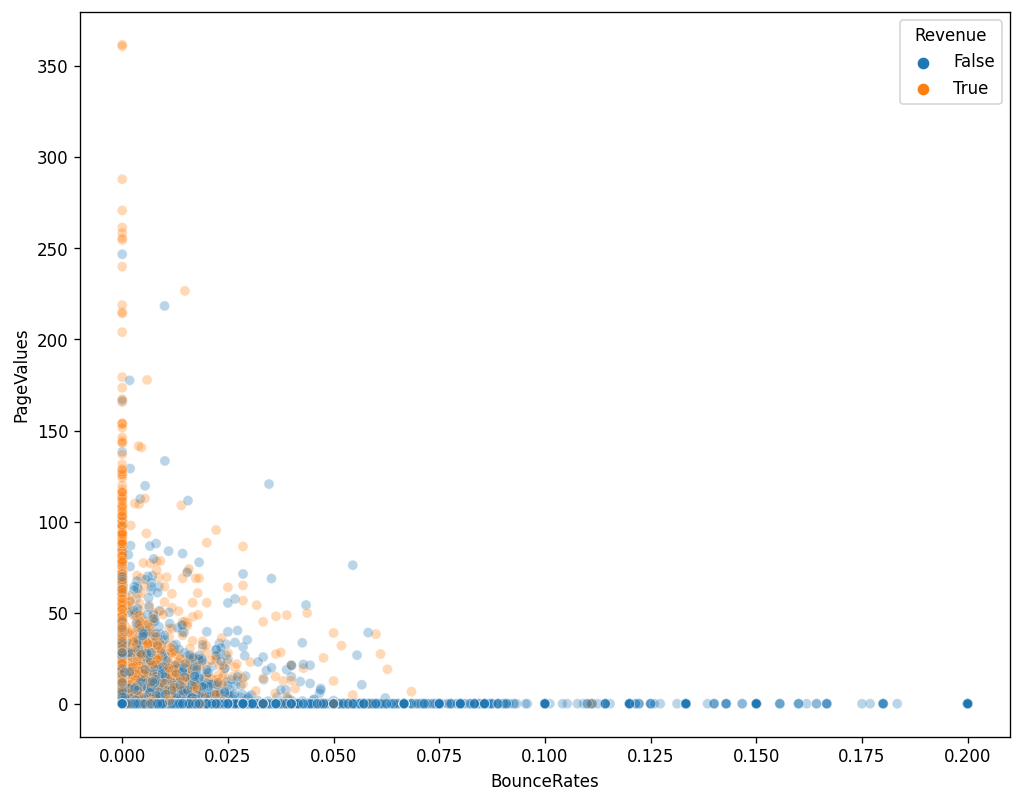

In [20]:
plt.figure(figsize=(10,8),dpi=120)
sns.scatterplot(data=df,x='BounceRates',y='PageValues',hue='Revenue',alpha=0.3)

In [21]:
shopping_df  = pd.get_dummies(df,drop_first=True)

In [22]:
shopping_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_20,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Weekend                        12330 non-null  bool   
 11  Revenue                        12330 non-null  bool   
 12  Month_Dec                      12330 non-null 

In [24]:
shopping_df['Weekend'] = shopping_df['Weekend'].map({False:0, True:1})
shopping_df['Revenue'] = shopping_df['Revenue'].map({False:0, True:1})

In [25]:
shopping_df[['Weekend','Revenue']]

,Weekend,Revenue
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
12325,1,0
12326,1,0
12327,1,0
12328,0,0


In [26]:
shopping_df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [27]:
X = shopping_df.drop('Revenue',axis=1)

In [28]:
y = shopping_df['Revenue']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
pred = model.predict(X_test)

In [60]:
 X = shopping_df.drop('Revenue',axis=1)
 y = shopping_df['Revenue']
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 clf = SVC(random_state=42)
 clf.fit(X_train, y_train)
 SVC(random_state=42)
 predictions = clf.predict(X_test)
 cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
 disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
 disp.plot()
 plt.show()

NameError: ignored

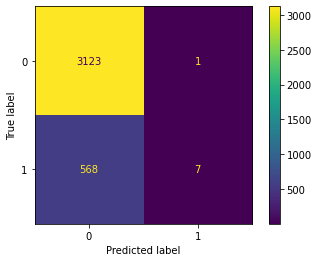

In [66]:
 import matplotlib.pyplot as plt
 from sklearn.datasets import make_classification
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
 from sklearn.model_selection import train_test_split
 from sklearn.svm import SVC
 X = shopping_df.drop('Revenue',axis=1)
 y = shopping_df['Revenue']
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 clf = SVC(random_state=42)
 clf.fit(X_train, y_train)
 SVC(random_state=42)
 predictions = clf.predict(X_test)
 cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
 disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
 disp.plot()
 plt.show()

In [64]:
print(accuracy_score(y_test,pred))

0.8799675587996756


In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.74      0.35      0.48       575

    accuracy                           0.88      3699
   macro avg       0.82      0.66      0.70      3699
weighted avg       0.87      0.88      0.86      3699

